<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изменим-тип-данных-и-обработаем-переменные-дат-и-времени" data-toc-modified-id="Изменим-тип-данных-и-обработаем-переменные-дат-и-времени-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменим тип данных и обработаем переменные дат и времени</a></span></li><li><span><a href="#Проверим-наличие-дубликатов" data-toc-modified-id="Проверим-наличие-дубликатов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверим наличие дубликатов</a></span></li><li><span><a href="#Изучим-данные-на-предмет-аномалий-и-ошибок" data-toc-modified-id="Изучим-данные-на-предмет-аномалий-и-ошибок-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изучим данные на предмет аномалий и ошибок</a></span></li><li><span><a href="#Обработаем-нулевые-значения" data-toc-modified-id="Обработаем-нулевые-значения-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обработаем нулевые значения</a></span></li><li><span><a href="#Проверим-категориальные-переменные" data-toc-modified-id="Проверим-категориальные-переменные-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Проверим категориальные переменные</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Расчет-метрик-по-месяцам-в-разрезе-пользователей" data-toc-modified-id="Расчет-метрик-по-месяцам-в-разрезе-пользователей-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Расчет метрик по месяцам в разрезе пользователей</a></span></li><li><span><a href="#Посчитаем-помесячную-выручку-с-каждого-пользователя" data-toc-modified-id="Посчитаем-помесячную-выручку-с-каждого-пользователя-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Посчитаем помесячную выручку с каждого пользователя</a></span></li><li><span><a href="#Проанализируем-различия-в-потреблении-между-тарифами" data-toc-modified-id="Проанализируем-различия-в-потреблении-между-тарифами-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проанализируем различия в потреблении между тарифами</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Сравнение-средней-выручки-по-тарифам" data-toc-modified-id="Сравнение-средней-выручки-по-тарифам-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Сравнение средней выручки по тарифам</a></span></li><li><span><a href="#Сравнение-средней-выручки-по-тарифам" data-toc-modified-id="Сравнение-средней-выручки-по-тарифам-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Сравнение средней выручки по тарифам</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком компании
На основе данных о поведении клиентов федерального оператора сотовой связи «Мегалайн» за 2018 год проанализируем, какой тариф - «Смарт» или «Ультра» - приносит больше денег компании. Анализ будет проводиться на выборке по 500 пользователям, содержащей информацию о характеристиках клиентов, изпользуемом тарифе, количестве звонков и сообщений. Это позволит сделать вывод, какой тариф лучше, и в дальнейшем скорректировать рекламный бюджет.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math
from IPython.display import display

## Изучение данных

Откроем файлы с данными и изучим общую информацию:

In [2]:
def file_read (server_path, filename):
    try: 
        file_read = pd.read_csv(server_path)
    except: 
        file_read = pd.read_csv(filename)
    return file_read

calls = file_read('/datasets/calls.csv','calls.csv')
internet = file_read('/datasets/internet.csv','internet.csv')
messages = file_read('/datasets/messages.csv', 'messages.csv')
tariffs = file_read('/datasets/tariffs.csv', 'tariffs.csv')
users = file_read('/datasets/users.csv','users.csv')

**Звонки**

In [3]:
calls.info()
display(calls.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
Unnamed: 0    202607 non-null int64
id            202607 non-null object
call_date     202607 non-null object
duration      202607 non-null float64
user_id       202607 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 7.7+ MB


,Unnamed: 0,id,call_date,duration,user_id
0,0,1000_0,2018-07-25,0.00,1000
1,1,1000_1,2018-08-17,0.00,1000
2,2,1000_2,2018-06-11,2.85,1000
3,3,1000_3,2018-09-21,13.80,1000
4,4,1000_4,2018-12-15,5.18,1000


В таблице calls 202607 записей и 4 переменные, пропусков не обнаружено, однако следует заменить тип данных call_date на формат datetime. Также для корректного расчета использованных пакетных минут необходимо округлить длительность каждого звонка до большего целого значения.

**Интернет**

In [4]:
internet.info()
internet = internet.drop('Unnamed: 0', 1)
display(internet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
Unnamed: 0      149396 non-null int64
Unnamed: 0.1    149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.8+ MB


,Unnamed: 0.1,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


В исходной таблице internet 149396 записей и 5 переменных, при этом один столбец лишний, поэтому удалили его из таблицы. Пропусков так же не обнаружено, однако следует зменить тип данных session_date на формат datetime.

**Сообщения**

In [5]:
messages.info()
display(messages.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
Unnamed: 0      123036 non-null int64
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(2), object(2)
memory usage: 3.8+ MB


,Unnamed: 0,id,message_date,user_id
0,0,1000_0,2018-06-27,1000
1,1,1000_1,2018-10-08,1000
2,2,1000_2,2018-08-04,1000
3,3,1000_3,2018-06-16,1000
4,4,1000_4,2018-12-05,1000


123036 наблюдений и 3 переменных в таблице messages, пропусков так же нет, следует заменить тип message_date на datetime.

**Тарифы**

In [6]:
tariffs.info()
display(tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
Unnamed: 0               2 non-null int64
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(8), object(1)
memory usage: 272.0+ bytes


,Unnamed: 0,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,0,50,15360,500,550,200,3,3,smart
1,1,1000,30720,3000,1950,150,1,1,ultra


В таблице содержатся характеристики двух тарифов, данные введены корректно. Обратим внимание, что дополнительный трафик тарифицируется по гигабайтам, что нужно учесть в дальнейших расчетах.

**Абоненты**

In [7]:
users.info()
display(users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Unnamed: 0    500 non-null int64
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(3), object(6)
memory usage: 35.3+ KB


,Unnamed: 0,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Единственная переменная с пропусками в таблице users - показатель оттока, что обосновано, поскольку пропущенные значения означают, что клиент продолжает пользоваться услугами оператора.

Проверим, по всем ли абонентам есть информация о звонках, трафике и сообщениях:

In [8]:
def inactive (table):
    u = users['user_id'].unique()
    a = table['user_id'].unique()
    result=list(set(u) - set(a))
    return result

print ('Абонентов без звонков:', len(inactive(calls)))
print ('Абонентов без трафика:', len(inactive(internet)))
print ('Абонентов без сообщений:', len(inactive(messages)))
print ('Неактивные абоненты:',list(set(inactive(calls)) & set(inactive(internet)) & set(inactive(messages))))

Абонентов без звонков: 8
Абонентов без трафика: 3
Абонентов без сообщений: 74
Неактивные абоненты: [1128, 1371]


В данных есть пользователи, которые не совершали звонков, не отправляли sms, не использовали мобильный интернет в 2018 году. Два абонента вообще не пользовались услугами связи и, зарегистрировавшись в декабре, сразу перешли в категорию ушедших клиентов (тем не менее, их нужно учитывать в анализе, поскольку абонентскую плату они выплачивали):

In [9]:
users.query('user_id == [1371,1128]')

,Unnamed: 0,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
371,371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


## Подготовка данных

### Изменим тип данных и обработаем переменные дат и времени ###

Приведем данные к нужным типам: заменим тип данных call_date, message_date, session_date и reg_date на формат datetime.

In [10]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

Добавим переменные месяцев. Это понадобится для анализа ежемесячного потребления услуг оператора.

In [11]:
calls['month'] = calls['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month

Поскольку каждый звонок засчитывается поминутно, округлим длительность звонков до большего целого значения (в минутах).

In [12]:
calls['duration'] = np.ceil(calls['duration'])

### Проверим наличие дубликатов ###

In [13]:
print('Дубликатов в таблице calls: {}'.format(calls.duplicated().sum()))
print('Дубликатов в таблице internet: {}'.format(internet.duplicated().sum()))
print('Дубликатов в таблице messages: {}'.format(messages.duplicated().sum()))
print('Дубликатов в таблице tariffs: {}'.format(tariffs.duplicated().sum()))
print('Дубликатов в таблице users: {}'.format(users.duplicated().sum()))

Дубликатов в таблице calls: 0
Дубликатов в таблице internet: 0
Дубликатов в таблице messages: 0
Дубликатов в таблице tariffs: 0
Дубликатов в таблице users: 0


Удалять дубликаты не нужно.

### Изучим данные на предмет аномалий и ошибок ###

Изучим переменные длительности звонков и потребления трафика.

count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

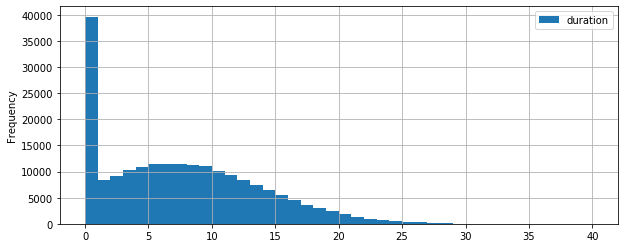

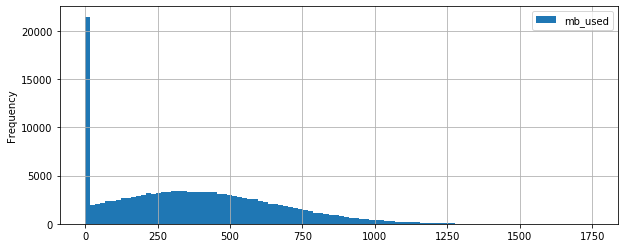

In [14]:
display(calls.loc[:,'duration'].describe())
calls.plot(y = 'duration', kind = 'hist', bins = 40, grid=True, figsize = (10,4), range = (0,40))

display(internet.loc[:,'mb_used'].describe())
internet.plot(y = 'mb_used', kind = 'hist', bins = 100, grid=True, figsize = (10,4), range = (0,1750))

50% совершаемых звонков длятся от 2 до 11 минут, в среднем 7 минут. 50% сессий потребляют от 138 до 560 мегабайт трафика, в среднем 379 мегабайт. Как у переменной duration, так и у переменной mb_used средние значения больше медианы, что говорит о том, что распределение скошено вправо. Кроме того, высокое стандартное отклонение говорит о сильном разбросе в данных и наличии выбросов.

Также у обеих переменных обнаружено много значений в районе 0, изучим их отдельно.

In [15]:
display(calls[calls['duration']== 0].head(10))
print('Количество звонков с длительностью 0: ', calls[calls['duration']== 0]['duration'].count())
print('Клиентов с пропущенными звонками: ', calls[calls['duration']== 0]['user_id'].value_counts().count())

,Unnamed: 0,id,call_date,duration,user_id,month
0,0,1000_0,2018-07-25,0.0,1000,7
1,1,1000_1,2018-08-17,0.0,1000,8
5,5,1000_5,2018-11-02,0.0,1000,11
6,6,1000_6,2018-10-18,0.0,1000,10
9,9,1000_9,2018-08-15,0.0,1000,8
36,36,1000_36,2018-10-09,0.0,1000,10
38,38,1000_38,2018-05-25,0.0,1000,5
39,39,1000_39,2018-06-13,0.0,1000,6
40,40,1000_40,2018-10-25,0.0,1000,10
47,47,1000_47,2018-07-14,0.0,1000,7


Количество звонков с длительностью 0:  39613
Клиентов с пропущенными звонками:  492


Длительность 39613 звонков (около 20% от всей совокупности) — 0.0 минут. При этом 492 клиента (почти все) имеют звонки с нулевой длительностью. Это могут быть пропущенные звонки. По сути это мусор в данных: если учитывать такие звонки наравне с успешными, результаты будут искажены. Значит, такие нулевые значения лучше не обрабатывать и убрать из данных.

In [16]:
display(internet[internet['mb_used']== 0].head(10))
print('Количество сессий с нулевым трафиком: ', internet[internet['mb_used']== 0]['mb_used'].count())
print('Клиентов с сессиями без потребления трафика: ', internet[internet['mb_used']== 0]['user_id'].value_counts().count())

,Unnamed: 0.1,id,mb_used,session_date,user_id,month
11,11,1000_11,0.0,2018-08-28,1000,8
38,38,1000_38,0.0,2018-11-27,1000,11
46,46,1000_46,0.0,2018-06-30,1000,6
67,67,1000_67,0.0,2018-06-16,1000,6
72,72,1000_72,0.0,2018-06-15,1000,6
103,103,1000_103,0.0,2018-05-26,1000,5
111,111,1000_111,0.0,2018-09-01,1000,9
131,131,1000_131,0.0,2018-06-15,1000,6
143,143,1000_143,0.0,2018-12-29,1000,12
157,157,1000_157,0.0,2018-07-11,1000,7


Количество сессий с нулевым трафиком:  19598
Клиентов с сессиями без потребления трафика:  494


Обнаружено 19598, или 13% сессий без потребления трафика. Такие сессии также есть почти у всех пользователей. По аналогии исключим такие значения из анализа.

### Обработаем нулевые значения ###

In [17]:
calls = calls.query('duration != 0')
internet = internet.query('mb_used != 0')

Еще раз посмотрим на распределения и графики.

count    162994.000000
mean          8.897880
std           5.353761
min           1.000000
25%           5.000000
50%           8.000000
75%          12.000000
max          38.000000
Name: duration, dtype: float64

count    129798.000000
mean        426.087210
std         255.596447
min           0.030000
25%         227.460000
50%         400.540000
75%         592.947500
max        1724.830000
Name: mb_used, dtype: float64

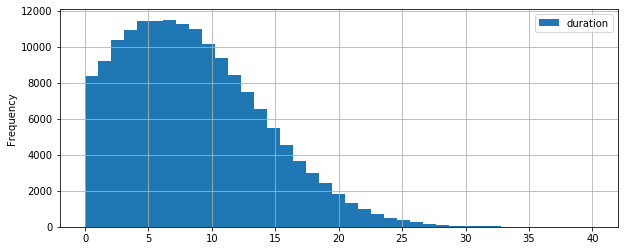

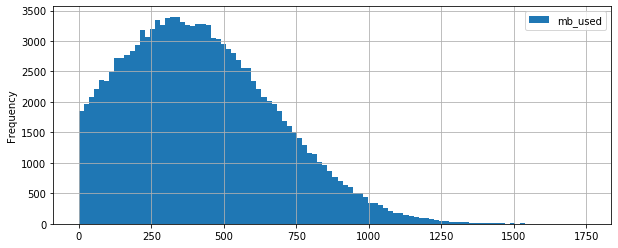

In [18]:
display(calls.loc[:,'duration'].describe())
calls.plot(y = 'duration', kind = 'hist', bins = 39, grid=True, figsize = (10,4), range = (0,40))

display(internet.loc[:,'mb_used'].describe())
internet.plot(y = 'mb_used', kind = 'hist', bins = 100, grid=True, figsize = (10,4), range = (0,1750))

Средние и медианные значения выросли, вариация снизилась, смещение распределения вправо сохранилось. Можно предположить, что данные в генеральной совокупности распределены нормально и симметрично, а скошенность - следствие ограниченного размера выборки.

### Проверим категориальные переменные ###

In [19]:
print(users['age'].unique())
print(users['city'].unique())          
print(users['first_name'].unique())    
print(users['last_name'].unique())    
print(users['tariff'].unique())        

[52 41 59 23 68 67 21 65 63 24 26 44 38 36 64 58 73 71 61 72 42 56 32 62
 20 51 28 66 31 37 47 40 69 48 33 39 43 46 45 55 53 34 49 25 18 70 50 19
 54 60 29 27 74 22 30 75 57 35]
['Краснодар' 'Москва' 'Стерлитамак' 'Новокузнецк' 'Набережные Челны'
 'Ульяновск' 'Челябинск' 'Пермь' 'Тюмень' 'Самара' 'Санкт-Петербург'
 'Иваново' 'Чебоксары' 'Омск' 'Уфа' 'Томск' 'Чита' 'Мурманск'
 'Петрозаводск' 'Тверь' 'Екатеринбург' 'Махачкала' 'Вологда' 'Череповец'
 'Ярославль' 'Сочи' 'Хабаровск' 'Ставрополь' 'Рязань' 'Улан-Удэ' 'Тула'
 'Саратов' 'Ростов-на-Дону' 'Казань' 'Иркутск' 'Курск' 'Калуга' 'Якутск'
 'Астрахань' 'Химки' 'Владикавказ' 'Волгоград' 'Саранск' 'Ижевск'
 'Новосибирск' 'Брянск' 'Тольятти' 'Нижний Тагил' 'Орёл' 'Белгород'
 'Воронеж' 'Волжский' 'Курган' 'Барнаул' 'Красноярск' 'Архангельск'
 'Липецк' 'Кемерово' 'Киров' 'Сургут' 'Пенза' 'Магнитогорск'
 'Нижний Новгород' 'Кострома' 'Владивосток' 'Тамбов' 'Балашиха'
 'Севастополь' 'Калининград' 'Оренбург' 'Смоленск' 'Нижневартовск'
 'Владимир

Все категориальные переменные закодированы корректно, аномальных значений или неявных дубликов не обнаружено.

Теперь все ошибки устранены, данные можно объединять в целостный массив для дальнейшего анализа.

## Исследовательский анализ данных

### Расчет метрик по месяцам в разрезе пользователей ###

Создадим таблицы по звонкам, трафику и сообщениям, где строки - это статистика каждого клиента с разрезе месяцев. Посчитаем для каждого пользователя: количество сделанных звонков и израсходованных минут разговора по месяцам; количество отправленных сообщений по месяцам; объем израсходованного интернет-трафика по месяцам.

In [20]:
calls_users = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'], fill_value=0)
calls_users.columns = ['total_calls', 'total_duration']

internet_users = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=['count', 'sum'], fill_value=0)
internet_users.columns = ['total_sessions', 'total_traffic']

messages_users = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc=['count'], fill_value=0)
messages_users.columns = ['total_messages']

Прежде чем приступать к объединению данных по звонкам, трафику и сообщениям, создадим таблицу активности абонентов в разрезе месяцев. Это позволит учесть абонентов, не использующих услуги связи, но при этом вносящих абонентскую плату.

In [21]:
# добавим расчет количества месяцев обслуживания в таблице users
# если churn_date пустые, принимаем декабрь за последний месяц
users['total_months'] = users['churn_date'].dt.month.fillna(value = 12) - users['reg_date'].dt.month + 1

# дублируем строки users по количеству месяцев обслуживания
data = users.loc[users.index.repeat(users['total_months'])]
data['month'] =(data.groupby(level=0)['reg_date']
                  .transform(lambda x: pd.date_range(start=x.iat[0], freq='M', periods=len(x)))).dt.month

print(len(data))
display(data.head(10))

3216


,Unnamed: 0,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,total_months,month
0,0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,5
0,0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,6
0,0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,7
0,0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,8
0,0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,9
0,0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,10
0,0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,11
0,0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,12
1,1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,2.0,11
1,1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,2.0,12


Получили 3216 записей помесячной активности абонентов.

Объединим таблицу с данными из трех таблиц об использовании услуг связи пользователями и параметрами тарифов.

In [22]:
data = data.join(calls_users, on=['user_id', 'month'], how="outer").join(internet_users, on=['user_id', 'month'], how="outer")\
.join(messages_users, on=['user_id', 'month'], how="outer", rsuffix='_y').reset_index()
data.head()

,index,Unnamed: 0,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,total_months,month,total_calls,total_duration,total_sessions,total_traffic,total_messages
0,0,0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,5,17.0,159.0,4.0,2253.49,22.0
1,0,0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,6,28.0,172.0,44.0,23233.77,60.0
2,0,0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,7,41.0,340.0,28.0,14003.64,75.0
3,0,0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,8,42.0,408.0,27.0,14055.93,81.0
4,0,0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,9,46.0,466.0,25.0,14568.91,57.0


In [23]:
data = data.merge(tariffs, left_on='tariff', right_on='tariff_name')
display(data.head())
print(data.info())

,index,Unnamed: 0_x,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,...,total_messages,Unnamed: 0_y,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,0,0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,...,22.0,1,1000,30720,3000,1950,150,1,1,ultra
1,0,0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,...,60.0,1,1000,30720,3000,1950,150,1,1,ultra
2,0,0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,...,75.0,1,1000,30720,3000,1950,150,1,1,ultra
3,0,0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,...,81.0,1,1000,30720,3000,1950,150,1,1,ultra
4,0,0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,...,57.0,1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 26 columns):
index                    3216 non-null int64
Unnamed: 0_x             3216 non-null int64
user_id                  3216 non-null int64
age                      3216 non-null int64
churn_date               189 non-null datetime64[ns]
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
total_months             3216 non-null float64
month                    3216 non-null int64
total_calls              3168 non-null float64
total_duration           3168 non-null float64
total_sessions           3201 non-null float64
total_traffic            3201 non-null float64
total_messages           2717 non-null float64
Unnamed: 0_y             3216 non-null int64
messages_included        3216 non-null int64
mb_pe

Поскольку пустые значения в объединенной таблице (в столбцах total_calls, total_duration, total_sessions, total_traffic, total_messages) - это фактически отсутствие потребления категории услуг конкретным абонентом в конкретный месяц, избавимся от пропущенных значений путем замены на 0.

In [24]:
varlist = ['total_calls', 'total_duration','total_sessions','total_traffic','total_messages']
data[varlist]= data[varlist].fillna(value=0)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 26 columns):
index                    3216 non-null int64
Unnamed: 0_x             3216 non-null int64
user_id                  3216 non-null int64
age                      3216 non-null int64
churn_date               189 non-null datetime64[ns]
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
total_months             3216 non-null float64
month                    3216 non-null int64
total_calls              3216 non-null float64
total_duration           3216 non-null float64
total_sessions           3216 non-null float64
total_traffic            3216 non-null float64
total_messages           3216 non-null float64
Unnamed: 0_y             3216 non-null int64
messages_included        3216 non-null int64
mb_pe

Проверим общее число абонентов в объединенной таблице и суммарные значения трафика, сообщений и звонков.

In [25]:
print('Число абонентов в объединенной таблице: ', len(data['user_id'].unique()))

df = pd.DataFrame({'После объединения': pd.Series(data[varlist].sum())})

df['Исходные данные']= [calls['duration'].count(), calls['duration'].sum(),\
 internet['mb_used'].count(), internet['mb_used'].sum(),messages['message_date'].count()]
display(df)

Число абонентов в объединенной таблице:  500


,После объединения,Исходные данные
total_calls,162994.00,162994.00
total_duration,1450301.00,1450301.00
total_sessions,129798.00,129798.00
total_traffic,55305267.73,55305267.73
total_messages,123036.00,123036.00


Контрольные суммы и число абонентов в исходной и сводной таблицах совпадают.

### Посчитаем помесячную выручку с каждого пользователя ###

Вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, а остаток умножим на значение из тарифного плана.
Поскольку трафик за месяц тарифицируется по гигабайтам, округлим трафик до целых гигабайт в большую сторону.
Результирующие значения - сколько каждый пользователь должен заплатить в этом месяце за дополнительный трафик, звонки и сообщения в рамках его тарифного плана.

In [26]:
data['calls_paid']= (
    data['total_duration']-data['minutes_included']).apply(
    lambda x: max(0,x))*data['rub_per_minute']
data['messages_paid']= (
    data['total_messages']-data['messages_included']).apply(
    lambda x: max(0,x))*data['rub_per_message']
data['traffic_paid']= (
    data['total_traffic']-data['mb_per_month_included']).apply(
    lambda x: math.ceil(max(0, x/1024)))*data['rub_per_gb']

Сложим дополнительные расходы на связь и интернет и абонентскую плату, соответствующую тарифному плану. В результате получим ежемесячную выручку по всем абонентам в выборке.

In [27]:
data['profit']= data['calls_paid'] + data['messages_paid'] + data['traffic_paid'] + data['rub_monthly_fee']

Удалим столбцы для промежуточных расчетов.

In [28]:
data.columns
data = data.drop(
    ['index','age', 'churn_date', 'first_name','last_name', 'reg_date', 'tariff', 'total_months',
 'messages_included', 'mb_per_month_included','minutes_included', 'rub_monthly_fee', 'rub_per_gb', 
 'rub_per_message','rub_per_minute', 'calls_paid', 'messages_paid','traffic_paid'], 1)
data.head()

,Unnamed: 0_x,user_id,city,month,total_calls,total_duration,total_sessions,total_traffic,total_messages,Unnamed: 0_y,tariff_name,profit
0,0,1000,Краснодар,5,17.0,159.0,4.0,2253.49,22.0,1,ultra,1950.0
1,0,1000,Краснодар,6,28.0,172.0,44.0,23233.77,60.0,1,ultra,1950.0
2,0,1000,Краснодар,7,41.0,340.0,28.0,14003.64,75.0,1,ultra,1950.0
3,0,1000,Краснодар,8,42.0,408.0,27.0,14055.93,81.0,1,ultra,1950.0
4,0,1000,Краснодар,9,46.0,466.0,25.0,14568.91,57.0,1,ultra,1950.0


Сравним переменные ежемесячного потребления услуг связи (звонки, сообщения и интернет) в разрезе тарифов "Смарт" и "Ультра". Изучим описательные статистики и построим графики плотности для визуализации распределения.

### Проанализируем различия в потреблении между тарифами ###

In [29]:
def compare (y, name):
    display (data.groupby('tariff_name')[y].describe().round(1))
    display (data.groupby('tariff_name')[y].agg(['var', 'std'], ddof=1).round(1))
    sns.kdeplot(data.query("tariff_name == 'ultra'")[y], shade=True, label="ultra", alpha=.5).set(xlim=(0))
    sns.kdeplot(data.query("tariff_name == 'smart'")[y], shade=True, label="smart", alpha=.5).set(xlim=(0))
    plt.title(name)
    plt.xlabel(y)
    plt.ylabel('Density')
    plt.show()
    sns.boxplot(x='tariff_name', y=y, data=data)

**Звонки**

,count,mean,std,min,25%,50%,75%,max
tariff_name,,,,,,,,
smart,2230.0,417.7,190.5,0.0,282.0,421.5,545.0,1435.0
ultra,986.0,526.1,317.9,0.0,282.5,518.0,751.8,1673.0


,var,std
tariff_name,,
smart,36281.4,190.5
ultra,101052.5,317.9


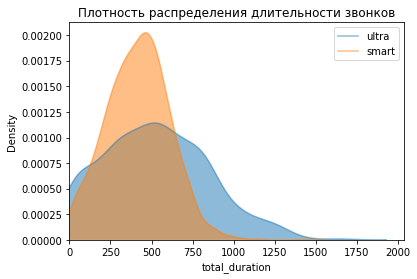

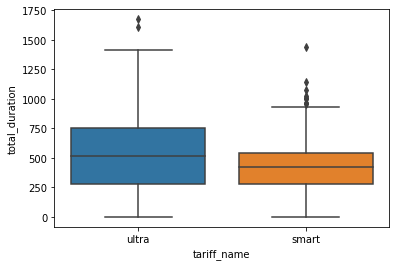

In [30]:
compare('total_duration', 'Плотность распределения длительности звонков')

**Сообщения**

,count,mean,std,min,25%,50%,75%,max
tariff_name,,,,,,,,
smart,2230.0,33.4,28.2,0.0,10.0,28.0,51.0,143.0
ultra,986.0,49.3,47.8,0.0,6.0,38.0,78.8,224.0


,var,std
tariff_name,,
smart,797.0,28.2
ultra,2285.4,47.8


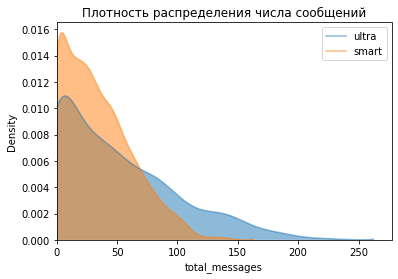

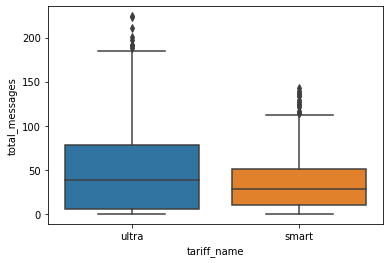

In [31]:
compare('total_messages', 'Плотность распределения числа сообщений')

**Интернет**

,count,mean,std,min,25%,50%,75%,max
tariff_name,,,,,,,,
smart,2230.0,16201.1,5879.2,0.0,12630.0,16505.5,20042.1,38552.4
ultra,986.0,19449.1,10101.1,0.0,11748.6,19304.0,26835.9,49745.7


,var,std
tariff_name,,
smart,34564843.5,5879.2
ultra,102032129.5,10101.1


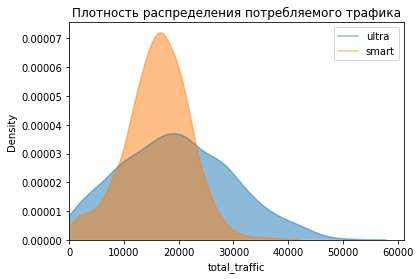

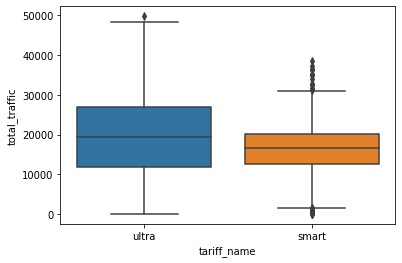

In [32]:
compare('total_traffic', 'Плотность распределения потребляемого трафика')

В среднем абоненты тарифа "Ультра" совершают на 26% больше звонков, на 48% чаще отправляют сообщения и потребляют на 20% больше интернет-трафика по сравнению с абонентами тарифа "Смарт". Об этом говорят отличия как в средних, так и в медианных значениях. При этом межквартильный размах и вариация данных (среднеквадратичное отклонение) среди абоненстов тарифа "Ультра" значительно больше, в то время как поведение абонентов тарифа "Смарт" более однородно, а при визуальном анализе ближе к нормальному распределению.

Распределния всех переменных (для обеих групп) скошены вправо, кроме длительности звонков абонентов "Смарт". Учитывая, что переменные не могут принимать отрицательные значения, число сообщенией отличается несимметричностью распределния (сильнее остальных скошен вправо), что говорит о присутствии выбросов. Также эта переменная характеризуется явным преобладанием наблюдений с 0 отправленных в месяц SMS, что можно объяснить массовым переходом на мессенджеры. 

Опираясь на визуальный анализ плотности распределения и описательные статистики, можно предположить, что абоненты тарифа "Ультра", с более высокой интенсивностью потребления услуг связи, приносят больше выручки компании. Выдвинем гипотезы.

## Проверка гипотез

### Сравнение средней выручки по тарифам ###

In [33]:
display (data.groupby('tariff_name')['profit'].describe().round(1))

,count,mean,std,min,25%,50%,75%,max
tariff_name,,,,,,,,
smart,2230.0,1289.6,818.4,550.0,550.0,1021.0,1750.0,6770.0
ultra,986.0,2070.0,376.0,1950.0,1950.0,1950.0,1950.0,4800.0


Средние выборочные (а также медианные) значения ежемесячной выручки по двум тарифам отличаются (на 60% больше среди абонентов "Ультра"), однако какова верояность получить такие различия случайно?

Проверим гипотезу "Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается" (это альтернативная гипотеза). Нулевая гипотеза: различий в выручке между тарифами нет.

Стандратное отклонение profit среди абонентов тарифа "Смарт" говорит о сильной вариации в данных, поэтому минимизируем риск обнаружения ложных межгрупповых отличий и установим пороговое значение alpha, равным 0.01, то есть будем отвергать нулевую гипотезу, если вероятность обнаружить межргупповые различия при их отсутствии в генеральной совокупности меньше 1%.

In [34]:
alpha = 0.01
results = st.ttest_ind(data.query("tariff_name == 'ultra'")['profit'], data.query("tariff_name == 'smart'")['profit'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.081909555489933e-161
Отвергаем нулевую гипотезу


**Вывод.**
Полученное значение p-value говорит о том, что выборочные средние достаточно далеки друг от друга, чтобы отбросить нулевую гипотезу об их равестве в генеральной совокупности (вероятность получить такое различие случайно крайне мала). Значит, средняя выручка тарифа "Смарт" статистически значимо отличается от выручки тарифа "Ультра".

### Сравнение средней выручки по тарифам ###

In [35]:
moscow_data = data.query("city == 'Москва'")
regions_data = data.query("city != 'Москва'")
display (moscow_data['profit'].describe().round(1))
display (regions_data['profit'].describe().round(1))

count     611.0
mean     1546.7
std       752.1
min       550.0
25%       780.5
50%      1750.0
75%      1950.0
max      5321.0
Name: profit, dtype: float64

count    2605.0
mean     1524.7
std       808.7
min       550.0
25%       750.0
50%      1583.0
75%      1950.0
max      6770.0
Name: profit, dtype: float64

Также будем использовать строгий критерий для проверки гипотезы (alpha=0.01), поскольку средние значения profit по группам очень близки и, учитывая сильную вариацию в данных, велик риск обнаружить ложноположительные отличия.

Различие выборочных средних между выручкой абонентов из Москвы и других регионов менее выражено: среднемесячная выручка в Москве всего на 1,6% больше.

Проверим гипотезу "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов" (альтернативная гипотеза). Нулевая гипотеза: различий в выручке между Московой и другими регионами нет.

In [36]:
results = st.ttest_ind(moscow_data['profit'], regions_data['profit'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5400751614511182
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средняя выруска абонентов из Москвы выше, с вероятностью 50% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними, отвергаем нулевую гипотезу, значимых отличий выручки между Москвой и другими регионами нет.

## Общий вывод

Предварительный анализ тарифов на небольшой выборке клиентов показал, что 50% совершаемых звонков длятся 5-12 минут, в среднем 9 минут, при этом 50% сессий потребляют 228-593 мегабайт трафика, в среднем 426 мегабайт. 

Однако есть различия в том, как абоненты разных тарифов пользуются услугами оператора. В частности, абоненты тарифа "Ультра" ежемесячно совершают на 30% больше звонков, на 58% чаще отправляют сообщения и потребляют на 21% больше интернет-трафика по сравнению с абонентами тарифа "Смарт". 

Также анализ показал, что абоненты тарифа "Ультра" в среднем приносят больше выручки компании, при этом отличия статистически значимы. Несмотря на это, следует учитывать, что эта категория абонентов занимает меньшую долю, по крайней мере в выборочной совокупности:

In [37]:
profit=data.pivot_table(
    index='tariff_name', values=['profit'], aggfunc=['count', 'sum']).reset_index()
profit.columns = ['tariff_name','count','sum']
profit['share']=profit['sum']/(profit['sum'].sum())*100
profit

,tariff_name,count,sum,share
0,smart,2230,2875901.0,58.489519
1,ultra,986,2041050.0,41.510481


Если в выборке соблюдена пропорция абонентов генеральной совокупности, то примерное соотношение выручки будет: 60% - у абонентов тарифа "Смарт" и 40% - у абонентов тарифа "Ультра". Следовательно, при принятии решений об оптимизации рекламного бюджета необходимо учитывать не только среднемесячную выручку с каждой категории абонентов, но и их баланс в клиентском портфеле.

Учитывая, что каждый новый абонент тарифа "Ультра" приносит в среднем больше выручки компании, этот тариф является более перспективным для продвижения.
    Однако этот вывод будет работать только при условии, что и затраты на привлечение одного абонента "Ультра" близки или хотя бы сопоставимы с CAC тарифа "Смарт". На практике может оказаться, что продвижение более догого тарифа приносит меньшую конверсию охвата в клиентов, и, следовательно, каждый новый клиент будет существенно дороже.